<a href="https://colab.research.google.com/github/blank0043/Machine-Learning/blob/main/project_9_Linear_Regression_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Fitting and Visualizing a Linear Regression Using scikit-learn
---

Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set, [please see the included .names file](http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names).

In [ ]:
# Glass identification data set
import pandas as pd

data_url = "https://raw.githubusercontent.com/blank0043/Machine-Learning/main/data/glass.csv"
glass = pd.read_csv(data_url)

In [ ]:
# change columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']

In [ ]:
glass.ri.head(3)

0    1.52101
1    1.51761
2    1.51618
Name: ri, dtype: float64

**Data Dictionary**

- `Id`: number: 1 to 214
- `RI`: refractive index  
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K` : Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type` : Type of glass:

**Pretend we want to predict `ri`, and our only feature is `al`. How could we do it using machine learning?**

<!--
**Answer:** We could frame it as a regression problem, and use a linear regression model with **`al`** as the only feature and **`ri`** as the response.
-->

**How would we visualize this model?**
<!--
**Answer:** Create a scatter plot with **`al`** on the x-axis and **`ri`** on the y-axis, and draw the line of best fit.
-->

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

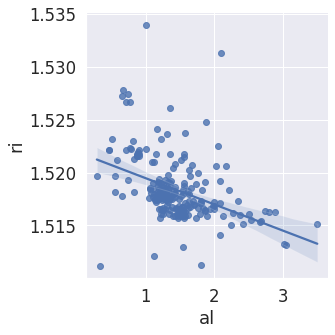

In [ ]:
#scatter with regression line
sns.lmplot(x='al', y='ri', data=glass);

*Re-draw plot without regression line

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


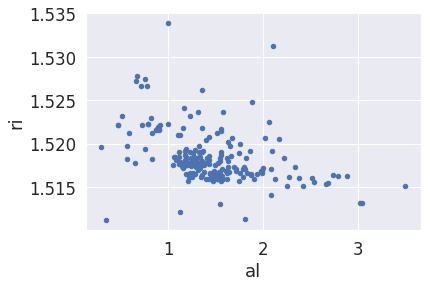

In [ ]:
# Scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

# Seaborn with parameters
#sns.lmplot(x='al', y='ri', data=glass, fit_reg=False);

To build a linear regression model to predict `ri` using scikit-learn, we will need to Import `LinearRegression` from `linear_model`.

**Using `LinearRegression`, fit a model predicting `ri` from `al` (and an intercept).**

In [ ]:
# Fit a linear regression model (name the model "linreg").
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg.fit(X, y)


LinearRegression()

**Using the `LinearRegression` object we have fit, create a variable that are our predictions for `ri` for each row's `al` in the data set.**

In [ ]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = linreg.predict(X)

# new column of y_pred
glass['y_pred'] = y_pred

In [ ]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1.519220
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1.518576
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1.518130
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1.518749
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1.518873
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1.514810
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1.517015
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1.516941
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1.517139


**Plot the predicted `ri` against each `al` as a line.**

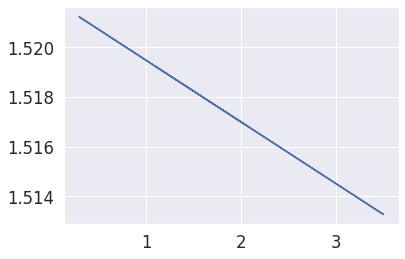

In [ ]:
# Plot those predictions connected by a line (try plt.plot()).
plt.plot(glass.al, glass.y_pred)

_Note the y axis labels when comparing to seaborns plot_

**Plot this regression line with the scatter points on the same chart.**

Text(0, 0.5, 'ri')

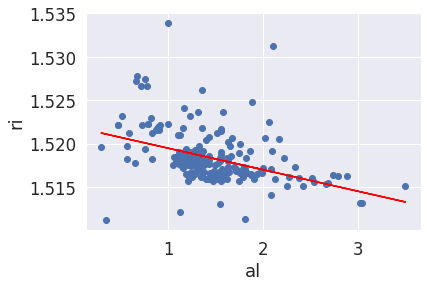

In [ ]:
# Put the plots together (use a scatter and line graph).
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.y_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

## Interpreting Linear Regression Coefficients
---

The simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `al` predictor.

**Print out the intercept and coefficient values from our fit `LinearRegression` object.**

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)

1.5219453302386425
[-0.00247761]


**Manually compute the predicted value of `ri` when `al=2.0` using the regression equation.**

In [ ]:
# Compute prediction for al=2 using the equation.
linreg.intercept_ + linreg.coef_[0] * 2

1.5169901174637033

**Confirm that this is the same value we would get when using the built-in `.predict()` method of the `LinearRegression` object.**

In [ ]:
# Compute prediction for al=2 using the predict method.
import numpy as np
a = np.array(2).reshape(-1, 1)
print(a)
print(a.shape)
# shape -> (number,)
linreg.predict(a)

[[2]]
(1, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.51699012])

**Coefficient interpretation:** A 1-unit increase in `al` is associated with a ~0.0025-unit decrease in `ri`.

**Intercept interpretation:** When `al = 0`, the estimated value of `ri` is 1.52194533024.

---

## Predicting a Single Categorical Response
---

In [ ]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1.519220
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1.518576
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1.518130
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1.518749
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1.518873
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1.514810
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1.517015
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1.516941
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1.517139


In [ ]:
# Examine glass_type.
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [ ]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

Text(0, 0.5, 'household')

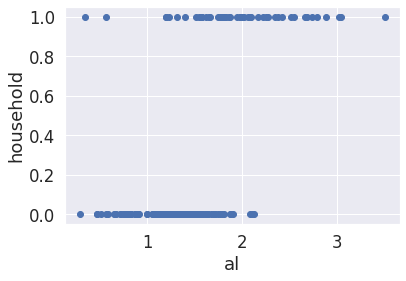

In [ ]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a regression line like we did before:

In [ ]:
# Fit a linear regression model and store the predictions.
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X) # prediction via Lin Reg

Text(0, 0.5, 'household')

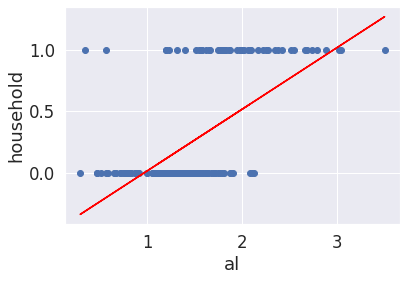

In [ ]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, create a new column of our predictions for whether a row is household glass.**

In [ ]:
# Understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False.
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [ ]:
# Transform household_pred to 1 or 0.
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


**Plot a line that shows our predictions for class membership in household vs. not.**

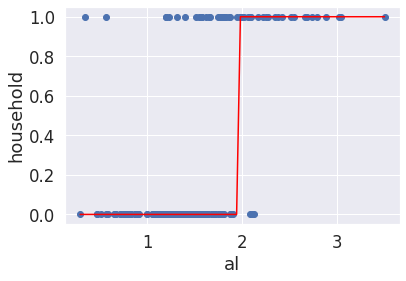

In [ ]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plot the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red')